In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris = pd.read_csv("./drive/MyDrive/IRIS.csv")

In [ ]:
# how many data points and features
print(iris.shape) # output - (rows, columns)

(150, 5)


In [ ]:
# what are names of the columns in the dataset
print(iris.columns) # output - Index(['columns_1', 'columns_2', 'columns_3', 'columns_4'])

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
# how many data points are present for each class
# here we can say,  how many flowers are there for each species
iris["species"].value_counts()
# output -
# setosa      50
# virginica   50
# versicolor  50
# Name: species, data_type: int64
# As there are equal number of data points present for each class the dataset is balanced dataset
# Otherwise, presence of unequal data points in classes is called unbalanced dataset
# In some case, there is minor difference in between number of data points between classes.
# this is called as almost balanced dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

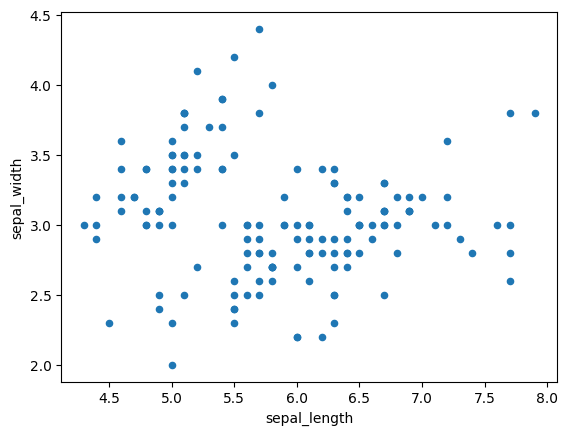

In [ ]:
# 2D scatter plot
iris.plot(kind = "scatter", x = 'sepal_length', y = 'sepal_width')
plt.show()

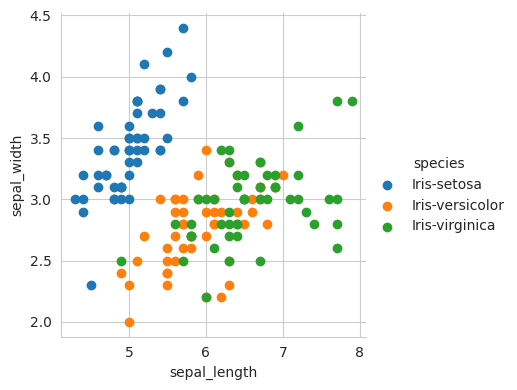

In [ ]:
# 2D scatter plot with color coding for each flower type/class
# here sns corresponds to seaborn
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=4) \
	 .map(plt.scatter, "sepal_length", "sepal_width") \
	 .add_legend()
plt.show()
# observation -
# 1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
# 2. Separating Versicolor and Virginica is hard as they overlap each other.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


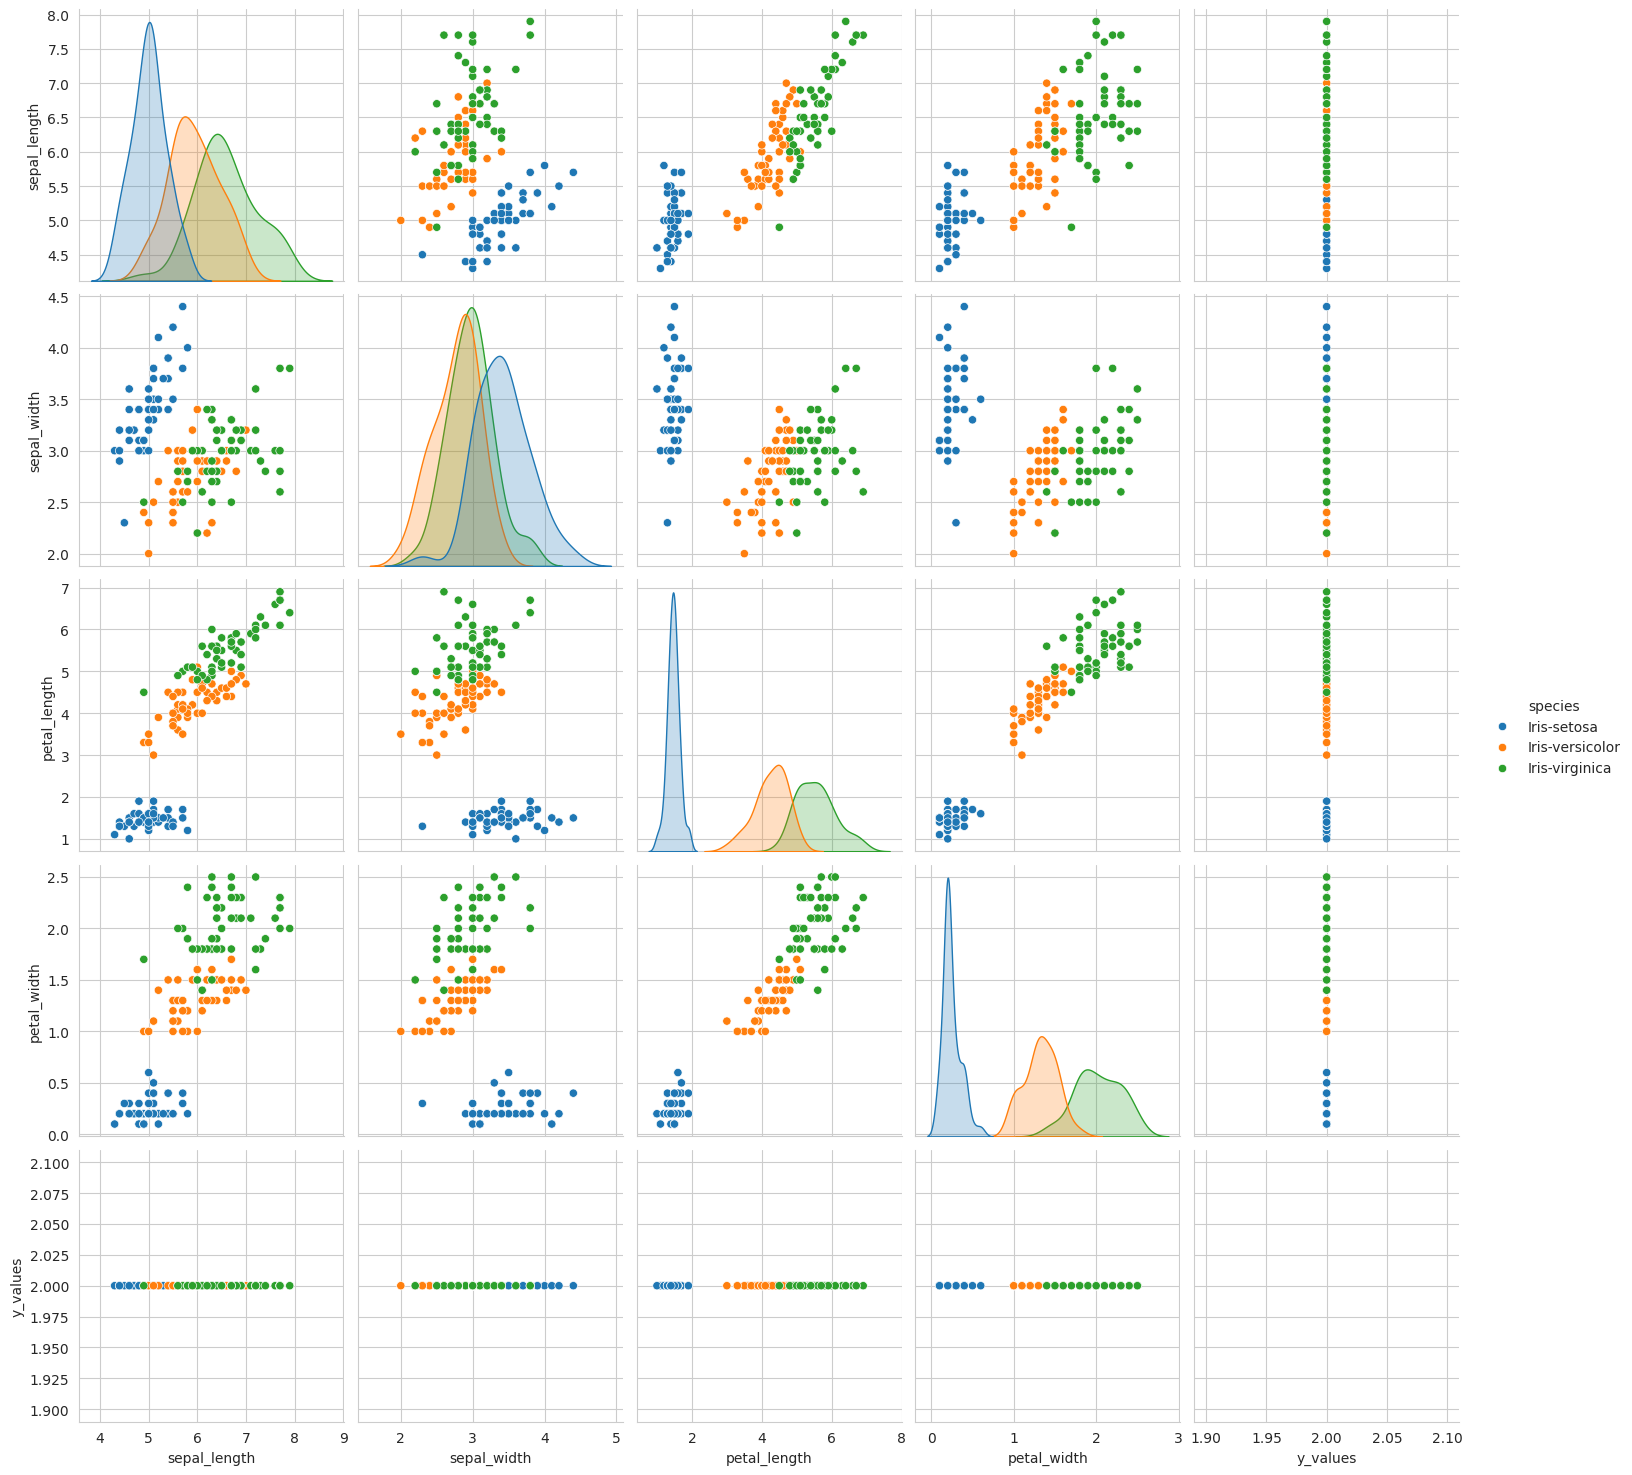

In [ ]:
# 3D plotting
# pair plot - pairwise scatter plot
# can be used when number of features are high
# cannot visualize higher dimentions patterns in 3D and 4D
# only possible to view 2D patterns
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue = "species", height = 3);
plt.show()

### Observations:
1] petal length and petal width are most useful features for analytics of various types of flowers

2] setosa can be separated linearly from viginica and versicolor

3] Hence we can use simple if else condition to build models for flower types classification

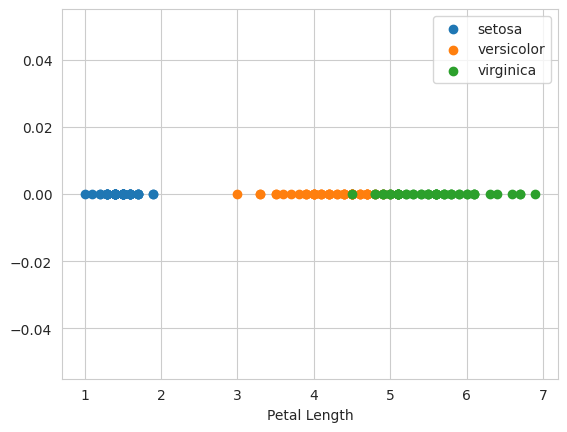

In [ ]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"];

plt.scatter(iris_setosa['petal_length'], np.zeros_like(iris_setosa['petal_length']), label='setosa');
plt.scatter(iris_versicolor['petal_length'], np.zeros_like(iris_versicolor['petal_length']), label='versicolor');
plt.scatter(iris_virginica['petal_length'], np.zeros_like(iris_virginica['petal_length']), label='virginica');

plt.xlabel("Petal Length")
plt.legend()
plt.show()


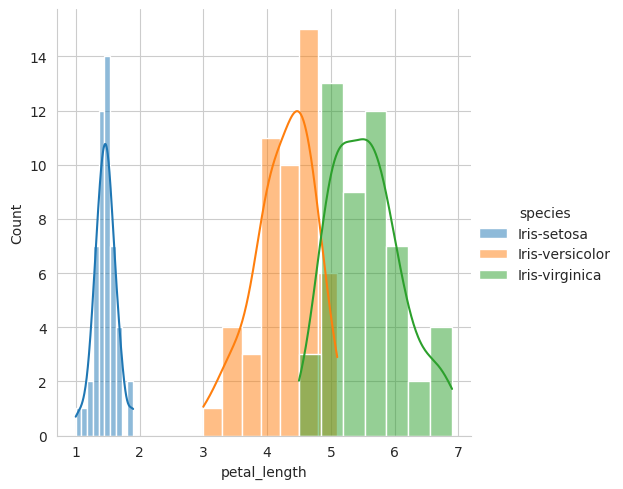

In [ ]:
# Histogram - consists of bars whose lengths represent the frequencies or counts of data points within predefined intervals, called bins.
# Univariate analyis - analysis of a single variable.
sns.FacetGrid(iris, hue="species", height=5)\
.map(sns.histplot, "petal_length", kde=True)\
.add_legend()

plt.show()

# Minor overlapping
# The blue lines are PDF i.e smooth histogram
# No setosa flower value more than 2
# We can build a simple model that says:
# IF PL < 2 : "The flower is setosa"

# The green and orange histograms are overlapping
# for versicolor : if PL > 3 && PL < 5.5
# for virginica : if PL > 4.5 && < 7


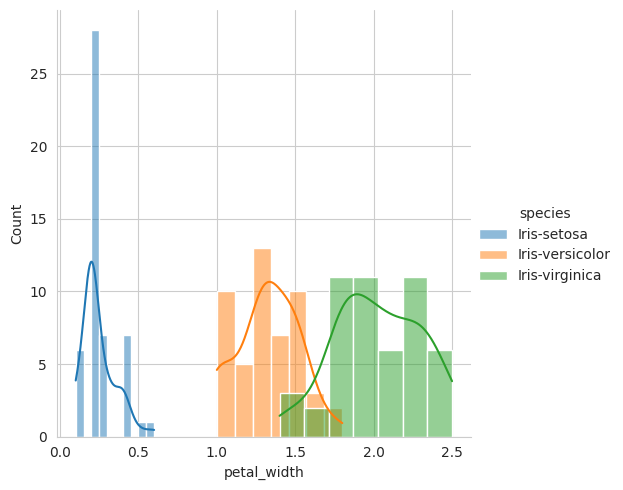

In [ ]:
sns.FacetGrid(iris, hue="species", height=5)\
.map(sns.histplot, "petal_width", kde=True)\
.add_legend()

plt.show()
# Major overlapping
#setosa is still separated from other two

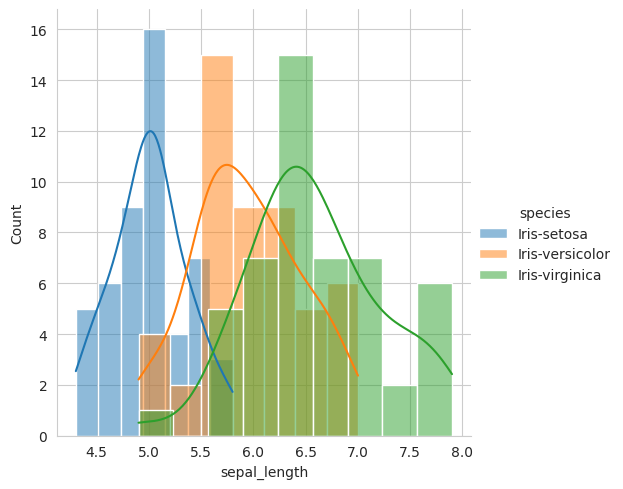

In [ ]:
sns.FacetGrid(iris, hue="species", height=5)\
.map(sns.histplot, "sepal_length", kde=True)\
.add_legend()

plt.show()

# Massive overlap

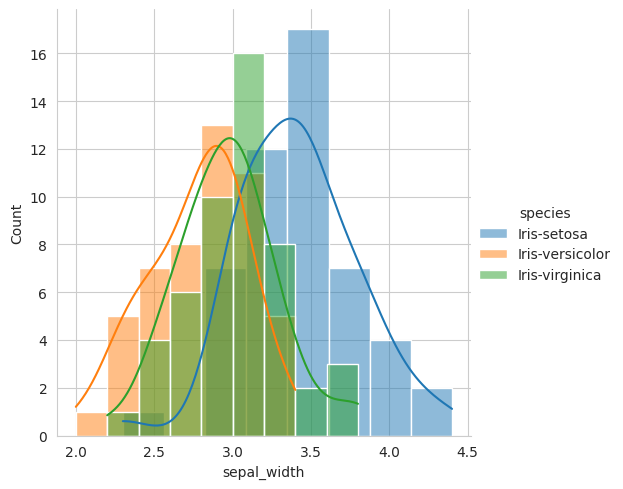

In [ ]:
sns.FacetGrid(iris, hue="species", height=5)\
.map(sns.histplot, "sepal_width", kde=True)\
.add_legend()

plt.show()

# Pure overlapping

# Complexity level (ascending order):

1] petal length - Lower complexity

2] petal width - Medium complexity

3] sepal length - Major complexity

4] sepal width - Purely complex

for analytics purpose, the features with less overlapping should be picked

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


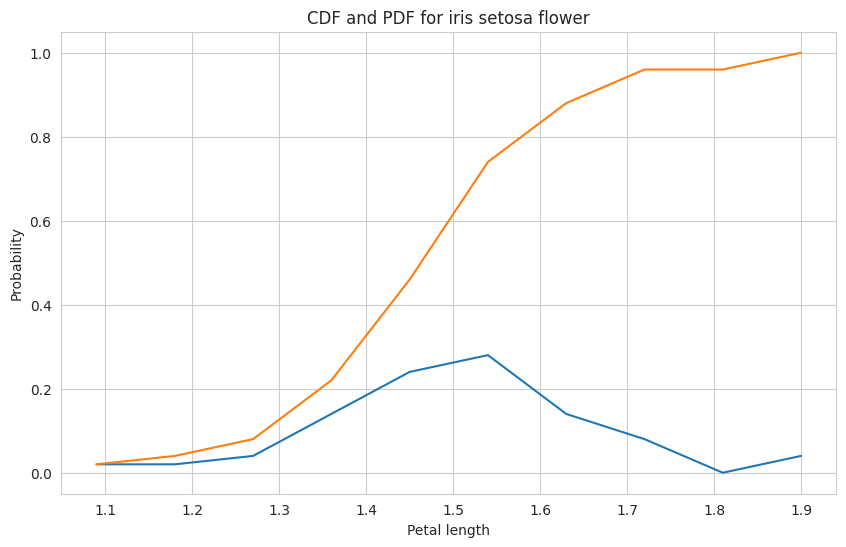

In [ ]:
# CDF(Cumulative distribution function) - the CDF provides information about the probability that the variable will be less than or equal to a given value
# PDF (Probability density function)- represents the probability of the variable falling within a specific range.
# Plot CDF of petal length
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True) #specifies that the data should be divided into 20 intervals or bins

# Avoid division by zero
pdf = counts / (sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Petal length')
plt.ylabel('Probability')
plt.title('CDF and PDF for iris setosa flower')

plt.show()


# orange line is CDF
# blue line is PDF

In [ ]:
# Mean, variance and standard deviation
print("Means:")
print(np.mean(iris_setosa["petal_length"]))

#mean with an outlier
print(np.mean(np.append(iris_setosa["petal_length"], 50)));
print(np.mean(iris_virginica["petal_length"]));
print(np.mean(iris_versicolor["petal_length"]));

print("\nStandard deviation:")
print(np.std(iris_setosa["petal_length"]));
print(np.std(iris_virginica["petal_length"]));
print(np.std(iris_versicolor["petal_length"]));

# Median
print("\nMedian:")
print(np.median(iris_setosa["petal_length"]));
# median with an outlier
print(np.median(np.append(iris_setosa["petal_length"], 50)));

# Quantiles
print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"], np.arange(0, 100, 25)))

# Percentiles
# Outliers have a minimal impact on the calculation of percentiles, making them useful in the presence of skewed or non-normally distributed data.
# Percentiles allow you to compare individual values to the overall distribution. For instance, if a data point is at the 75th percentile, it means it is greater than or equal to 75% of the values in the dataset.
# In fields like healthcare and child development, percentiles are often used to assess an individual's growth or health status compared to a reference population. For example, a child in the 90th percentile for height is taller than 90% of children in the same age group.
print("\nPercentiles:")
print(np.percentile(iris_setosa["petal_length"], 90))
print(np.percentile(iris_versicolor["petal_length"], 90))
print(np.percentile(iris_virginica["petal_length"], 90))

# MAD - Calculate the average of all these absolute differences.
from statsmodels import robust
print("\nMean absolute deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Standard deviation:
0.17176728442867112
0.546347874526844
0.4651881339845203

Median:
1.5
1.5

Quantiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

Percentiles:
1.7
4.8
6.31

Mean absolute deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211


1. **Mean (Average):**
   - **Calculation:** Add up all the numbers and divide by the total count.
   - **Purpose:** Represents the central tendency of the data.

   Example: For the set {3, 7, 2, 8, 4, 5, 10}
   \[ \text{Mean} = \frac{3 + 7 + 2 + 8 + 4 + 5 + 10}{7} = \frac{39}{7} \approx 5.57 \]

2. **Median:**
   - **Calculation:** Arrange the numbers in ascending order and find the middle value.
   - **Purpose:** Provides the middle point of the data, resistant to extreme values.

   Example: For the set {3, 7, 2, 8, 4, 5, 10}
   - Arrange in ascending order: {2, 3, 4, 5, 7, 8, 10}
   - The median is 5.

3. **Standard Deviation:**
   - **Calculation:** Measures the amount of variation or dispersion in a set of values.
   - **Purpose:** Indicates how spread out the values are from the mean.

   Example: For the set {3, 7, 2, 8, 4, 5, 10}
   - Calculate the mean (as we did before): \(\text{Mean} \approx 5.57\)
   - Calculate the squared differences from the mean: {(3-5.57)^2, (7-5.57)^2, ...}
   - Sum these squared differences, divide by the count, and take the square root.

   The formula is a bit more complex, but Python libraries like NumPy or pandas can handle these calculations easily. If you want to calculate it manually, it involves several steps.

In summary:
- **Mean:** Average value, gives an overall sense.
- **Median:** Middle value, resistant to extreme values.
- **Standard Deviation:** Measures the spread of values around the mean.

-----------------------------

Imagine you have a dataset of test scores: [85, 90, 88, 92, 78].

1. **Calculate the Mean (Average):**
   Mean = 85 + 90 + 88 + 92 + 78/5 = 86.6

2. **Calculate the Absolute Deviation for each score:**
   - Absolute Deviation for 85: \(|85 - 86.6| = 1.6\)
   - Absolute Deviation for 90: \(|90 - 86.6| = 3.4\)
   - Absolute Deviation for 88: \(|88 - 86.6| = 1.4\)
   - Absolute Deviation for 92: \(|92 - 86.6| = 5.4\)
   - Absolute Deviation for 78: \(|78 - 86.6| = 8.6\)

3. **Calculate the Mean Absolute Deviation (MAD):**
   MAD = 1.6 + 3.4 + 1.4 + 5.4 + 8.6 / 5 = 4.08

So, in this example, the Mean Absolute Deviation (MAD) is 4.08. This means that, on average, the test scores deviate from the mean by about 4.08 points. It gives you a sense of how much individual scores vary from the average.

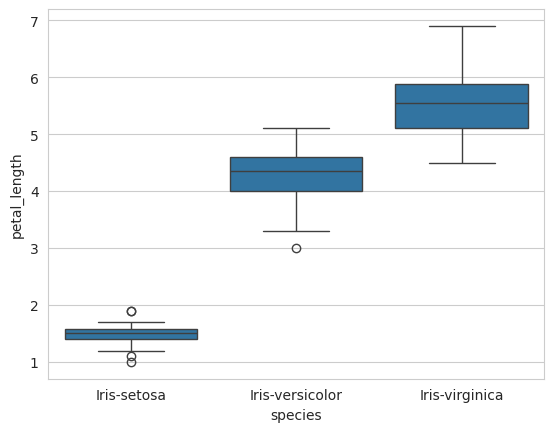

In [ ]:
# Boxplots
sns.boxplot(x="species", y="petal_length", data=iris)
plt.show()

# Box: The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The height of the box is therefore Q3 - Q1. The line inside the box represents the median.

# Whiskers: Whiskers extend from the box and indicate the range of the data. The length of the whiskers is often determined by a parameter (e.g., 1.5 times the IQR). Points beyond the whiskers are considered potential outliers.

# Outliers: Individual data points beyond the whiskers are considered outliers and are plotted individually.

# Notches (optional): Notches may be present on the sides of the box. Notches provide a rough guide to the uncertainty about the median, and if the notches of two boxes do not overlap, it suggests that the medians are significantly different.

[]

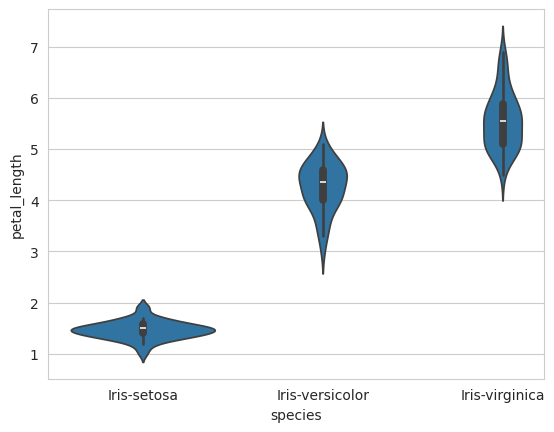

In [ ]:
# Violin plots
# this merges the box plot and smooth histogram(PDF)
# white dot indicates median
# the sides indicate the smooth histogram(PDF)
sns.violinplot(x="species", y="petal_length", data=iris)
plt.plot()

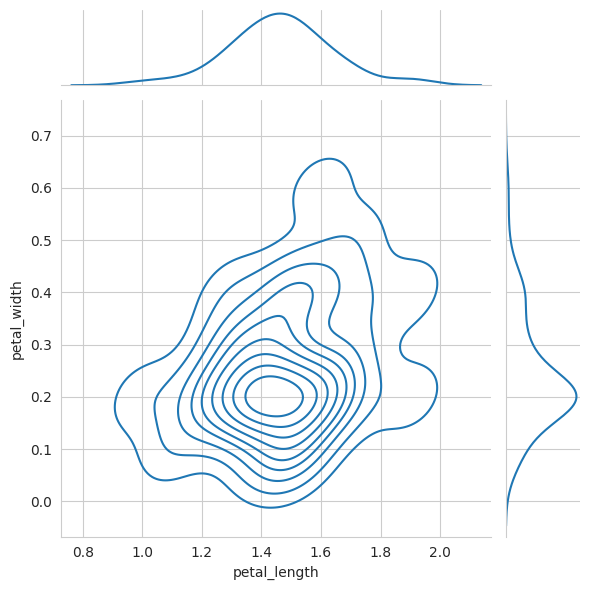

In [ ]:
# Multivariate contour density plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde")
plt.show()

# Observations -
# 1] Imagine the center coming towards you (as it's 3D)
# 2] Imagine the 3D hill becomming much and much higher as we go towards the centre
# 3] The lines or shades are known as contours

# Summary :
1] Univariate analysis - PDF, CDF, Box Plots, Violin Plots

2] Bivariate analysis - Pair Plot, Scatter Plot

3] Multivariate analysis - 3D plot, Multivariate contour density plot